In [30]:
import pandas

In [31]:
df = pandas.read_json('bgg_data.json')
df.columns = df.iloc[0]
df.drop(df.head(1).index, inplace=True)
df

,id,year,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,age,mechanics,categories,families,expansions,poll_age,poll_numpl,numrated,numcomments,bayesaverage,average
1,1,1986,3,5,240.0,240.0,240.0,14.0,"[Alliances, Area Majority / Influence, Auction...","[Economic, Negotiation, Political]","[Country: Germany, Political: Elections, Serie...",0,"[[2, 0], [3, 0], [4, 0], [5, 0], [6, 0], [8, 0...","[[0, 1, 80], [0, 1, 81], [1, 25, 72], [23, 83,...",5280,1995,7.11488,7.6157
2,2,1981,3,4,30.0,30.0,30.0,12.0,[Trick-taking],"[Card Game, Fantasy]",[Creatures: Dragons],0,"[[2, 0], [3, 0], [4, 0], [5, 0], [6, 0], [8, 0...","[[0, 0, 2], [0, 0, 2], [0, 1, 1], [3, 0, 0], [...",560,307,5.79027,6.64231
3,3,1998,2,4,60.0,30.0,60.0,10.0,"[Area Majority / Influence, Hand Management, H...","[Abstract Strategy, Medieval]","[Country: Japan, Digital Implementations: Triq...",0,"[[2, 0], [3, 0], [4, 0], [5, 0], [6, 5], [8, 1...","[[0, 0, 148], [103, 152, 16], [179, 92, 2], [8...",14958,3779,7.24174,7.45133
4,4,1992,2,4,60.0,60.0,60.0,12.0,"[Action Points, Area Majority / Influence, Auc...",[Ancient],"[Containers: Triangular Boxes, Country: Egypt,...",0,"[[2, 0], [3, 0], [4, 0], [5, 0], [6, 0], [8, 0...","[[0, 0, 4], [1, 3, 2], [6, 2, 0], [4, 4, 0], [...",338,119,5.68493,6.59769
5,5,1964,2,6,90.0,90.0,90.0,12.0,"[Hand Management, Investment, Market, Square G...","[Economic, Territory Building]",[Series: 3M Bookshelf Series],2,"[[2, 0], [3, 0], [4, 0], [5, 0], [6, 0], [8, 6...","[[0, 0, 193], [2, 41, 194], [63, 164, 44], [21...",18411,5790,7.14469,7.33715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313244,343618,None,None,None,None,None,None,None,[],[],[],0,[],"[[None, None, None]]",0,0,0.0,0.0
313245,343627,1998,2,8,0.0,0.0,0.0,0.0,[Deck Construction],"[Card Game, Collectible Components, Fantasy]",[Setting: Shadowrun],1,[],"[[None, None, None]]",0,0,0.0,0.0
313246,343628,1998,2,4,15.0,15.0,15.0,12.0,[Tile Placement],[City Building],[Cities: Ratingen (Germany)],0,[],"[[None, None, None]]",0,0,0.0,0.0
313247,343629,2018,3,6,0.0,0.0,0.0,16.0,"[Finale Ending, Single Loser Game]",[Card Game],[],0,[],"[[None, None, None]]",0,0,0.0,0.0


<AxesSubplot:ylabel='Frequency'>

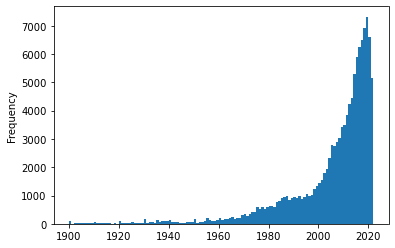

In [32]:
df['year'].plot.hist(bins=122,range=(1900,2022))

<AxesSubplot:ylabel='Frequency'>

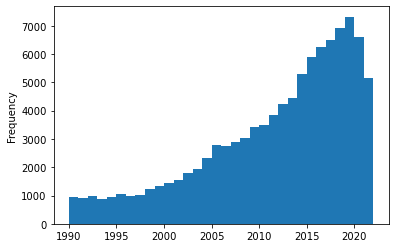

In [33]:
df['year'].plot.hist(bins=32,range=(1990,2022))

In [38]:
df[ df['year']<2000 ]['id'].count() / df['id'].count()

0.1253383900296251

In [220]:
df2 = df[
    df.apply(lambda row:
        (not (row['year'] is None) ) and
        (row['year'] >= 2000) and
        (row['year'] <= 2021) and
        (row['bayesaverage'] > 0) and
        (len(row['mechanics']) > 0),
    axis=1)
]
df2

,id,year,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,age,mechanics,categories,families,expansions,poll_age,poll_numpl,numrated,numcomments,bayesaverage,average,mech2
351,387,2000,3,7,45.0,45.0,45.0,10.0,[Hand Management],"[Bluffing, Card Game]",[Series: Blue Games (Descartes)],0,"[[2, 0], [3, 0], [4, 0], [5, 0], [6, 0], [8, 0...","[[0, 0, 4], [0, 0, 4], [0, 6, 0], [4, 2, 0], [...",337,133,5.5509,5.81844,{Hand Management}
426,475,2000,2,5,90.0,45.0,90.0,12.0,"[Auction/Bidding, Auction: Turn Order Until Pa...","[Bluffing, Political]","[Cities: Agra (India), Country: India, Series:...",0,"[[2, 0], [3, 0], [4, 0], [5, 0], [6, 0], [8, 1...","[[0, 0, 84], [0, 14, 82], [13, 68, 40], [103, ...",7149,2231,6.93109,7.27751,"{Auction, Set Collection, Card Drafting, Netwo..."
429,478,2000,2,8,60.0,20.0,60.0,10.0,"[Action Drafting, Card Drafting, Drafting, Los...","[Bluffing, Card Game, City Building, Deduction...","[Mechanism: Tableau Building, Series: Fantasy ...",1,"[[2, 0], [3, 0], [4, 0], [5, 0], [6, 14], [8, ...","[[1, 4, 612], [179, 313, 423], [189, 416, 272]...",49176,9840,6.97364,7.07999,"{Variable Player Powers, Turn Order: Role Orde..."
432,481,2000,2,4,60.0,60.0,60.0,12.0,"[Area Majority / Influence, Dice Rolling, Hand...","[Abstract Strategy, Medieval, Territory Building]",[Digital Implementations: Yucata],0,"[[2, 0], [3, 0], [4, 0], [5, 1], [6, 0], [8, 0...","[[0, 0, 54], [35, 54, 7], [58, 32, 6], [21, 38...",3429,1094,6.38725,6.81879,"{Team-Based Game, Dice Rolling, Area Majority ..."
441,490,2000,2,6,60.0,60.0,60.0,12.0,"[Dice Rolling, Hexagon Grid]","[Fantasy, Mythology, Print & Play, Wargame]",[],0,"[[2, 0], [3, 0], [4, 0], [5, 0], [6, 1], [8, 4...","[[0, 2, 2], [8, 3, 0], [1, 6, 3], [2, 4, 2], [...",262,201,5.65154,7.70292,"{Dice Rolling, Hexagon Grid}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309025,339031,2021,2,5,50.0,50.0,50.0,12.0,"[Area Movement, Dice Rolling, Events, Multiple...","[Adventure, Dice, Exploration, Miniatures, Mov...",[Players: One versus Many],1,"[[2, 0], [3, 0], [4, 0], [5, 0], [6, 0], [8, 2...","[[0, 0, 3], [1, 2, 0], [1, 2, 0], [0, 3, 0], [...",72,33,5.59128,8.04653,"{Team-Based Game, Variable Player Powers, Mult..."
309559,339592,2021,2,6,45.0,20.0,45.0,10.0,"[Hand Management, Push Your Luck, Set Collecti...","[Animals, Card Game, Party Game]","[Admin: Unreleased Games, Animals: Sheep, Card...",0,"[[2, 0], [3, 0], [4, 0], [5, 0], [6, 0], [8, 0...","[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], [...",31,13,5.50032,8.83871,"{Set Collection, Push Your Luck, Hand Manageme..."
310786,340909,2021,1,2,30.0,20.0,30.0,14.0,"[Campaign / Battle Card Driven, Card Play Conf...","[Adventure, Card Game, Fantasy, Print & Play]","[Misc: No Table Needed, Players: Games with So...",0,"[[2, 0], [3, 0], [4, 0], [5, 0], [6, 0], [8, 0...","[[4, 0, 0], [0, 2, 2], [0, 0, 4]]",51,33,5.56187,8.55059,"{Scenario / Mission / Campaign Game, Solo / So..."
311131,341284,2021,1,4,120.0,90.0,120.0,14.0,"[Action/Event, Cooperative Game, Dice Rolling,...","[Dice, Exploration, Fantasy]","[Category: Dungeon Crawler, Players: Games wit...",0,"[[2, 0], [3, 0], [4, 0], [5, 0], [6, 0], [8, 0...","[[2, 2, 0], [2, 1, 0], [0, 2, 0], [0, 1, 1], [...",30,4,5.53672,8.31667,"{Dice Rolling, Action/Event, Solo / Solitaire ..."


In [221]:
set( x for xs in df2['mechanics'] for x in xs )

{'Acting',
 'Action Drafting',
 'Action Points',
 'Action Queue',
 'Action Retrieval',
 'Action Timer',
 'Action/Event',
 'Advantage Token',
 'Alliances',
 'Area Majority / Influence',
 'Area Movement',
 'Area-Impulse',
 'Auction/Bidding',
 'Auction: Dexterity',
 'Auction: Dutch',
 'Auction: Dutch Priority',
 'Auction: Fixed Placement',
 'Auction: Once Around',
 'Auction: Sealed Bid',
 'Auction: Turn Order Until Pass',
 'Automatic Resource Growth',
 'Betting and Bluffing',
 'Bias',
 'Bingo',
 'Bribery',
 'Campaign / Battle Card Driven',
 'Card Drafting',
 'Card Play Conflict Resolution',
 'Catch the Leader',
 'Chaining',
 'Chit-Pull System',
 'Closed Economy Auction',
 'Command Cards',
 'Commodity Speculation',
 'Communication Limits',
 'Connections',
 'Constrained Bidding',
 'Contracts',
 'Cooperative Game',
 'Crayon Rail System',
 'Critical Hits and Failures',
 'Cube Tower',
 'Deck Construction',
 'Deck, Bag, and Pool Building',
 'Deduction',
 'Delayed Purchase',
 'Dice Rolling',
 'D

In [69]:
df['mech2'] = df['mechanics'].apply(lambda xs: set(
    'Auction' if x.startswith('Auction') else
    'Worker Placement' if x.startswith('Worker Placement') else
    x for x in xs ))

In [222]:
mech2 = set( x for xs in df2['mech2'] for x in xs )
mech2

{'Acting',
 'Action Drafting',
 'Action Points',
 'Action Queue',
 'Action Retrieval',
 'Action Timer',
 'Action/Event',
 'Advantage Token',
 'Alliances',
 'Area Majority / Influence',
 'Area Movement',
 'Area-Impulse',
 'Auction',
 'Automatic Resource Growth',
 'Betting and Bluffing',
 'Bias',
 'Bingo',
 'Bribery',
 'Campaign / Battle Card Driven',
 'Card Drafting',
 'Card Play Conflict Resolution',
 'Catch the Leader',
 'Chaining',
 'Chit-Pull System',
 'Closed Economy Auction',
 'Command Cards',
 'Commodity Speculation',
 'Communication Limits',
 'Connections',
 'Constrained Bidding',
 'Contracts',
 'Cooperative Game',
 'Crayon Rail System',
 'Critical Hits and Failures',
 'Cube Tower',
 'Deck Construction',
 'Deck, Bag, and Pool Building',
 'Deduction',
 'Delayed Purchase',
 'Dice Rolling',
 'Die Icon Resolution',
 'Different Dice Movement',
 'Drafting',
 'Elapsed Real Time Ending',
 'Enclosure',
 'End Game Bonuses',
 'Events',
 'Finale Ending',
 'Flicking',
 'Follow',
 'Force Comm

In [223]:
sum(df['mech2'].apply(lambda xs: 'Auction' in xs))

4681

In [224]:
mech_freq = sorted(
    (( sum(df2['mech2'].apply(lambda xs: x in xs)), x )
        for x in mech2),
    reverse=True )
mech_freq

[(7128, 'Dice Rolling'),
 (6351, 'Hand Management'),
 (5143, 'Variable Player Powers'),
 (3187, 'Set Collection'),
 (2922, 'Cooperative Game'),
 (2871, 'Card Drafting'),
 (2700, 'Modular Board'),
 (2182, 'Tile Placement'),
 (2122, 'Area Majority / Influence'),
 (1844, 'Action Points'),
 (1651, 'Deck, Bag, and Pool Building'),
 (1599, 'Grid Movement'),
 (1535, 'Simultaneous Action Selection'),
 (1390, 'Hexagon Grid'),
 (1363, 'Worker Placement'),
 (1343, 'Simulation'),
 (1310, 'Take That'),
 (1291, 'Area Movement'),
 (1190, 'Team-Based Game'),
 (1159, 'Auction'),
 (1065, 'Push Your Luck'),
 (988, 'Point to Point Movement'),
 (913, 'Solo / Solitaire Game'),
 (882, 'Player Elimination'),
 (874, 'Memory'),
 (862, 'Role Playing'),
 (842, 'Roll / Spin and Move'),
 (834, 'Campaign / Battle Card Driven'),
 (825, 'Pattern Building'),
 (747, 'Network and Route Building'),
 (694, 'Trading'),
 (685, 'Storytelling'),
 (679, 'Pick-up and Deliver'),
 (660, 'Action Queue'),
 (541, 'Variable Phase Orde

In [186]:
def transpose_list(l):
    return list(map(list,zip(*l)))

In [225]:
Nmech = 5
rating_over_time = [
    [ [0,0] for _ in range(Nmech) ]
    for _ in range(2021-2000+1)
]

def sum_rating(r,ms,y):
    yr = rating_over_time[y-2000]
    for i,m in enumerate(mech_freq[:Nmech]):
        if m[1] in ms:
            yr[i][0] += 1
            yr[i][1] += r

df2[['bayesaverage','mech2','year']].apply(
    lambda row: sum_rating(*row), axis=1)

mech_avg_rating = transpose_list(
    [ R/n for n,R in nR ] for nR in rating_over_time
)

In [134]:
import matplotlib.pyplot as plt

In [190]:
plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['figure.dpi'] = 200

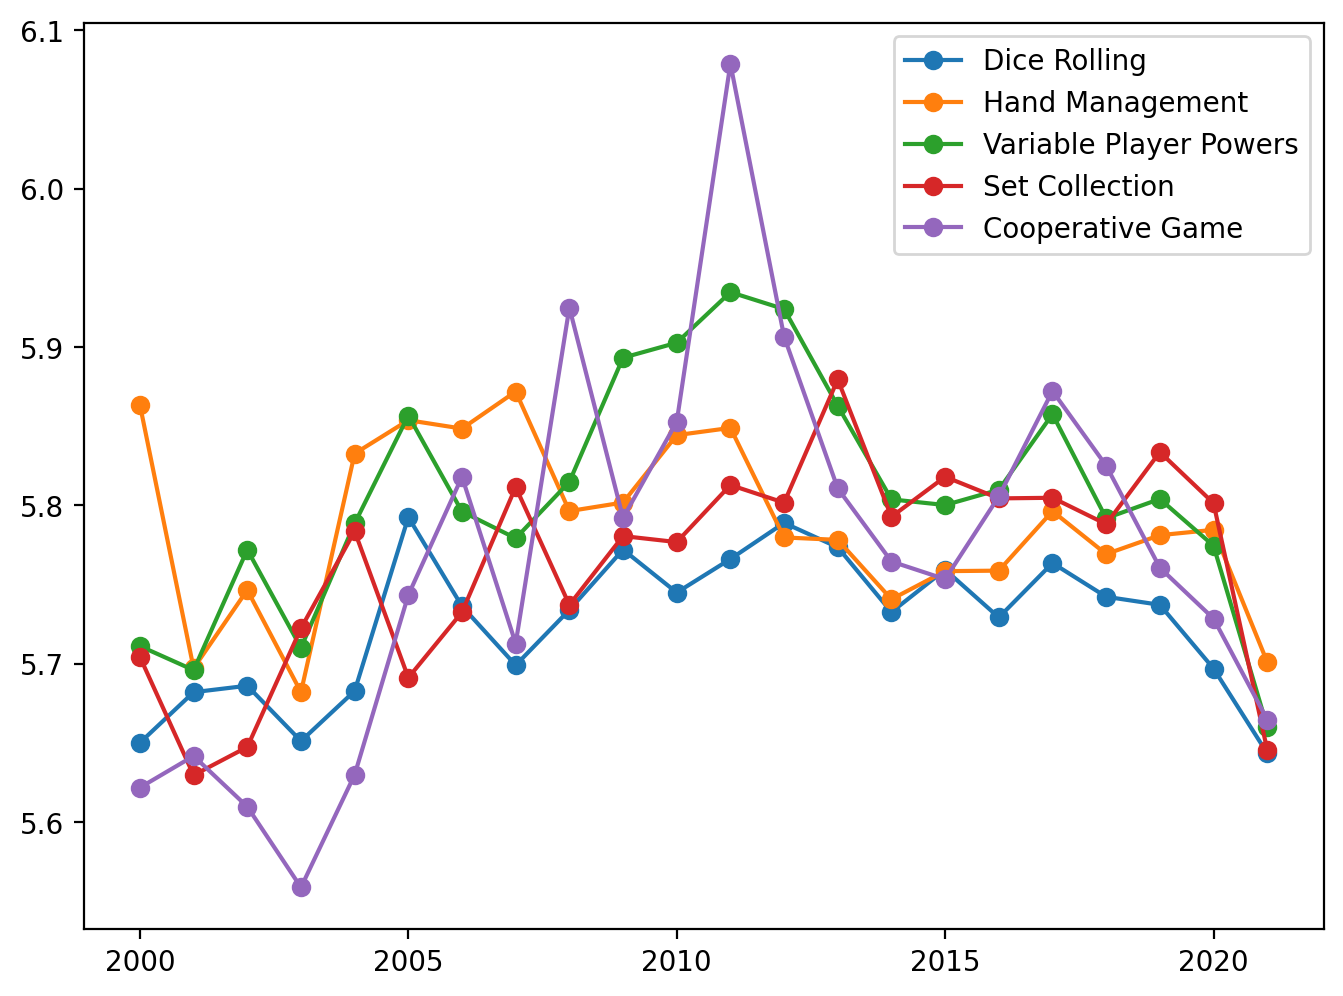

In [226]:
for rating in mech_avg_rating: 
    plt.plot(
        list(range(2000,2021+1)),
        rating,
        linestyle='-', marker='o')
plt.legend([ x[1] for x in mech_freq[:Nmech]])

<BarContainer object of 20 artists>

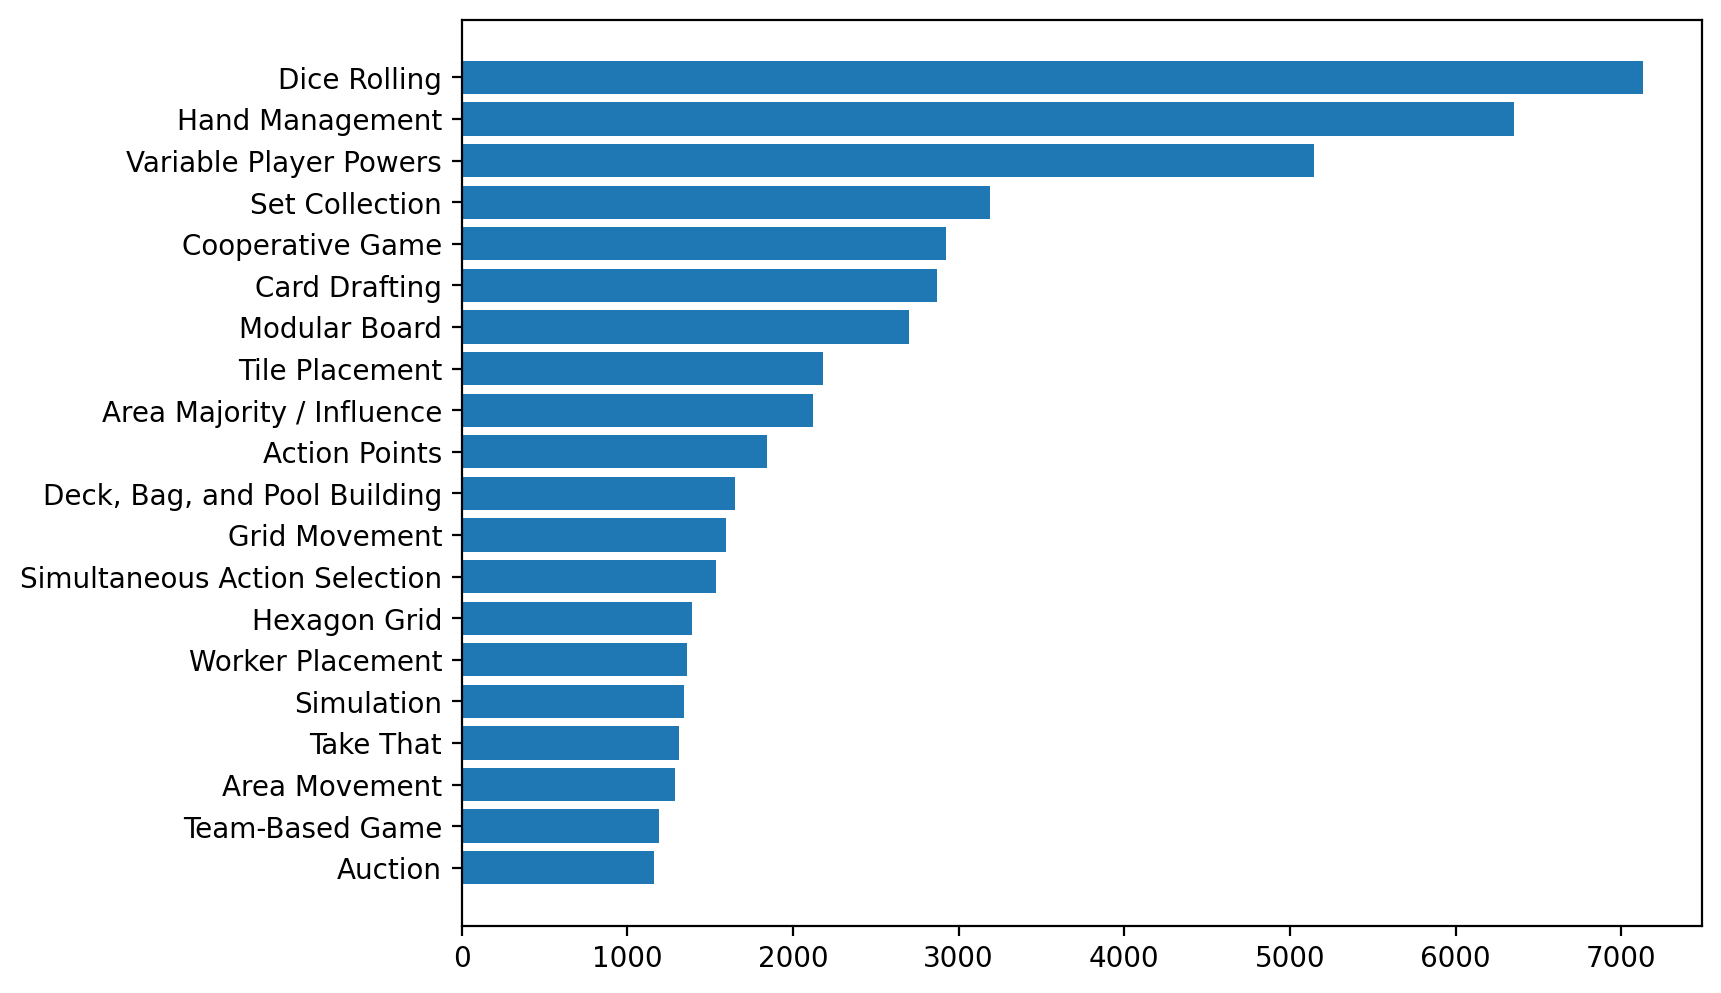

In [227]:
plt.barh(*(reversed(transpose_list(reversed(mech_freq[:20])))))

In [250]:
import math

In [261]:
# Nmech = len(mech_freq)
Nmech = 50
mech_overlap = [ [0]*Nmech for _ in range(Nmech) ]

def get_overlap(ms):
    for i1,(n1,m1) in enumerate(mech_freq[:Nmech]):
        for i2,(n2,m2) in enumerate(mech_freq[:Nmech]):
            if m1 in ms:
                if m1==m2:
                    if len(ms)==1:
                        mech_overlap[i1][i2] += 1
                elif m2 in ms:
                    mech_overlap[i1][i2] += 1

def ignore(_):
    pass
                    
ignore(df2['mech2'].apply(lambda x: get_overlap(x)))

for i in range(Nmech):
    n = mech_freq[i][0]
    row = mech_overlap[i]
    for j in range(Nmech):
        row[j] /= n

# for x in mech_overlap:
#     print(x)

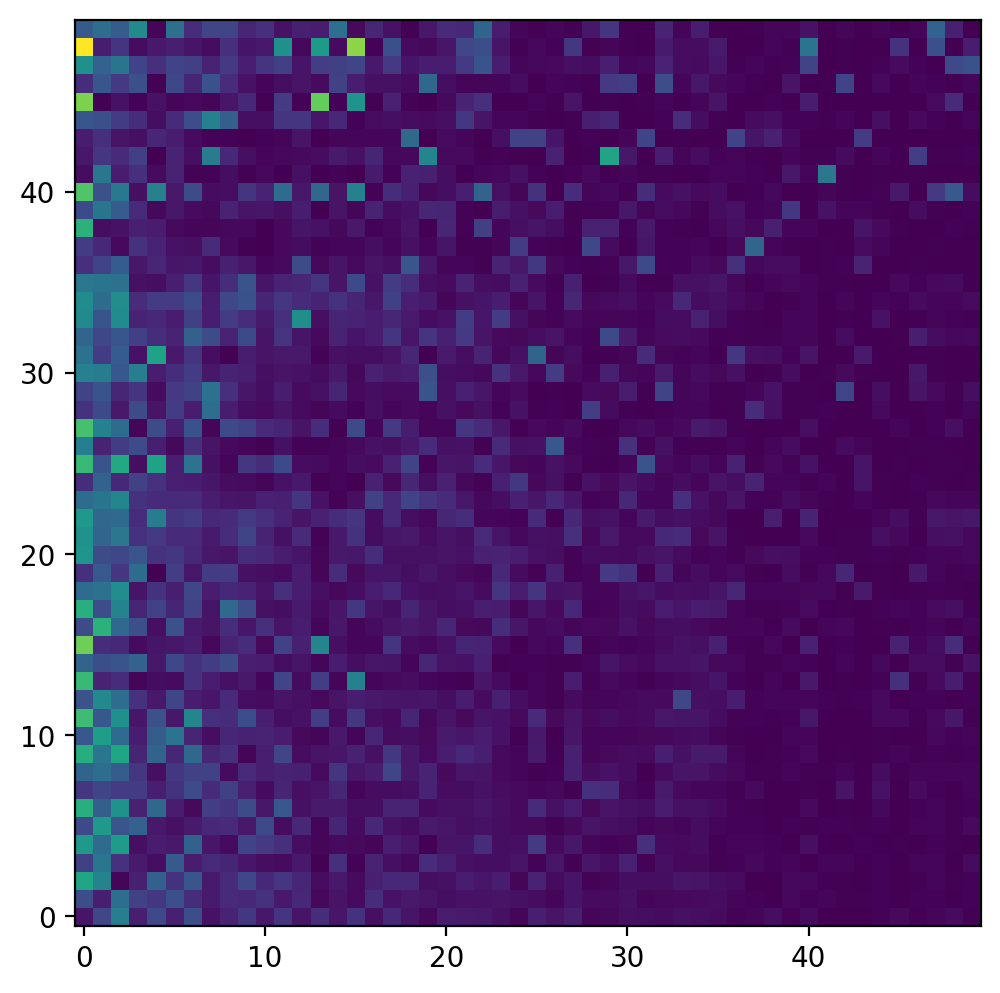

In [262]:
plt.imshow(mech_overlap,origin='lower')